In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Variability
The mean tells us where a histogram balances. But in almost every histogram we have seen, the values spread out on both sides of the mean. How far from the mean can they be? To answer this question, we will develop a measure of variability about the mean.

We will start by describing how to calculate the measure. Then we will see why it is a good measure to calculate.

## The Rough Size of Deviations from Average
For simplicity, we will begin our calculations in the context of a simple array `any_numbers` consisting of just four values. As you will see, our method will extend easily to any other array of values.

In [2]:
any_numbers = make_array(1, 2, 2, 10)

The goal is to measure roughly how far off the numbers are from their average. To do this, we first need the average: 

In [3]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

Next, let's find out how far each value is from the mean. These are called the *deviations from the average*. A "deviation from average" is just a value minus the average. The table `calculation_steps` displays the results.

In [4]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


Some of the deviations are negative; those correspond to values that are below average. Positive deviations correspond to above-average values.

To calculate roughly how big the deviations are, it is natural to compute the mean of the deviations. But something interesting happens when all the deviations are added together:

In [5]:
sum(deviations)

0.0

The positive deviations exactly cancel out the negative ones. This is true of all lists of numbers, no matter what the histogram of the list looks like: **the sum of the deviations from average is zero.** 

Since the sum of the deviations is 0, the mean of the deviations will be 0 as well:

In [6]:
np.mean(deviations)

0.0

Because of this, the mean of the deviations is not a useful measure of the size of the deviations. What we really want to know is roughly how big the deviations are, regardless of whether they are positive or negative. So we need a way to eliminate the signs of the deviations.

There are two time-honored ways of losing signs: the absolute value, and the square. It turns out that taking the square constructs a measure with extremely powerful properties, some of which we will study in this course.

So let's eliminate the signs by squaring all the deviations. Then we will take the mean of the squares:

In [7]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [8]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance:** The mean squared deviation calculated above is called the *variance* of the values. 

While the variance does give us an idea of spread, it is not on the same scale as the original variable as its units are the square of the original. This makes interpretation very difficult. 

So we return to the original scale by taking the positive square root of the variance:

In [9]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

## Standard Deviation

The quantity that we have just computed is called the *standard deviation* of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition.** The SD of a list is defined as the *root mean square of deviations from average*. That's a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

**Computation.** The five steps described above result in the SD. You can also use the function ``np.std`` to compute the SD of values in an array:

In [10]:
np.std(any_numbers)

3.6314597615834874

## Working with the SD

To see what we can learn from the SD, let's move to a more interesting dataset than `any_numbers`. The table `nba13` contains data on the players in the National Basketball Association (NBA) in 2013. For each player, the table records the position at which the player usually played, his height in inches, his weight in pounds, and his age in years.

In [11]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


Here is a histogram of the players' heights.

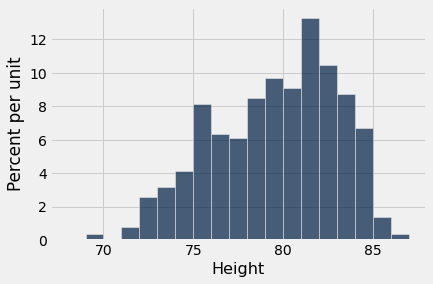

In [12]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

It is no surprise that NBA players are tall! Their average height is just over 79 inches (6'7"), about 10 inches taller than the average height of men in the United States.

In [13]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

About how far off are the players' heights from the average? This is measured by the SD of the heights, which is about 3.45 inches.

In [14]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

The towering center Hasheem Thabeet of the Oklahoma City Thunder was the tallest player at a height of 87 inches.

In [15]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


Thabeet was about 8 inches above the average height.

In [16]:
87 - mean_height

7.934653465346528

That's a deviation from average, and it is about 2.3 times the standard deviation:

In [17]:
(87 - mean_height)/sd_height

2.2995015194397923

In other words, the height of the tallest player was about 2.3 SDs above average.

At 69 inches tall, Isaiah Thomas was one of the two shortest NBA players in 2013. His height was about 2.9 SDs below average.

In [18]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [19]:
(69 - mean_height)/sd_height

-2.9169868288775844

What we have observed is that the tallest and shortest players were both just a few SDs away from the average height. This is an example of why the SD is a useful measure of spread. No matter what the shape of the histogram, the average and the SD together tell you a lot about where the histogram is situated on the number line.

## First main reason for measuring spread by the SD

**Informal statement.** In all numerical data sets, the bulk of the entries are within the range "average $\pm$ a few SDs".

For now, resist the desire to know exactly what fuzzy words like "bulk" and "few" mean. We wil make them precise later in this section. Let's just examine the statement in the context of some more examples.

We have already seen that *all* of the heights of the NBA players were in the range "average $\pm$ 3 SDs". 

What about the ages? Here is a histogram of the distribution, along with the mean and SD of the ages.

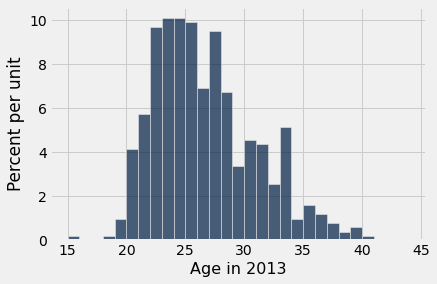

In [20]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [21]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

The average age was just over 26 years, and the SD was about 4.3 years.

How far off were the ages from the average? Just as we did with the heights, let's look at an example.

Juwan Howard was the oldest player, at 40. 

In [22]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39
Derek Fisher,Guard,73,210,39


Howard's age was about 3.2 SDs above average.

In [23]:
(40 - mean_age)/sd_age

3.1958482778922357

What we have observed for the heights and ages is true in great generality. For *all* lists, the bulk of the entries are no more than 2 or 3 SDs away from the average. 

## Chebychev's Bounds
The Russian mathematician [Pafnuty Chebychev](https://en.wikipedia.org/wiki/Pafnuty_Chebyshev) (1821-1894) proved a result that makes our rough statements precise.

**For all lists, and all numbers $z$, the proportion of entries that are in the range
"average $\pm z$ SDs" is at least $1 - \frac{1}{z^2}$.**

It is important to note that the result gives a bound, not an exact value or an approximation.

What makes the result powerful is that it is true for all lists – all distributions, no matter how irregular. 

Specifically, it says that for every list:

- the proportion in the range "average $\pm$ 2 SDs" is **at least 1 - 1/4 = 0.75**

- the proportion in the range "average $\pm$ 3 SDs" is **at least 1 - 1/9 $\approx$ 0.89**

- the proportion in the range "average $\pm$ 4.5 SDs" is **at least 1 - 1/$\boldsymbol{4.5^2}$ $\approx$ 0.95**

As we noted above, Chebychev's result gives a lower bound, not an exact answer or an approximation. For example, the percent of entries in the range "average $\pm ~2$ SDs" might be quite a bit larger than 75%. But it cannot be smaller.

## Standard units

In the calculations above, the quantity $z$ measures *standard units*, the number of standard deviations above average.

Some values of standard units are negative, corresponding to original values that are below average. Other values of standard units are positive. But no matter what the distribution of the list looks like, Chebychev's bounds imply that standard units will typically be in the (-5, 5) range.

To convert a value to standard units, first find how far it is from average, and then compare that deviation with the standard deviation.

$$
z ~=~ \frac{\mbox{value }-\mbox{ average}}{\mbox{SD}}
$$

As we will see, standard units are frequently used in data analysis. So it is useful to define a function that converts an array of numbers to standard units.

In [24]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

## Example
As we saw in an earlier section, the table `united` contains a column `Delay` consisting of the departure delay times, in minutes, of over thousands of United Airlines flights in the summer of 2015. We will create a new column called `Delay (Standard Units)` by applying the function `standard_units` to the column of delay times. This allows us to see all the delay times in minutes as well as their corresponding values in standard units. 

In [25]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


The standard units that we can see are consistent with what we expect based on Chebychev's bounds. Most are of quite small size; only one is above 6.

But something rather alarming happens when we sort the delay times from highest to lowest. The standard units that we can see are extremely high!

In [26]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


What this shows is that it is possible for data to be many SDs above average (and for flights to be delayed by almost 10 hours). The highest value of delay is more than 14 in standard units. 

However, the proportion of these extreme values is small, and Chebychev's bounds still hold true. For example, let us calculate the percent of delay times that are in the range "average $\pm$ 3 SDs". This is the same as the percent of times for which the standard units are in the range (-3, 3). That is about 98%, as computed below, consistent with Chebychev's bound of "at least 89%". 

In [27]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

The histogram of delay times is shown below, with the horizontal axis in standard units. By the table above, the right hand tail continues all the way out to $z=14.27$ standard units (580 minutes). The area of the histogram outside the range $z=-3$ to $z=3$ is about 2%, put together in tiny little bits that are mostly invisible in the histogram.

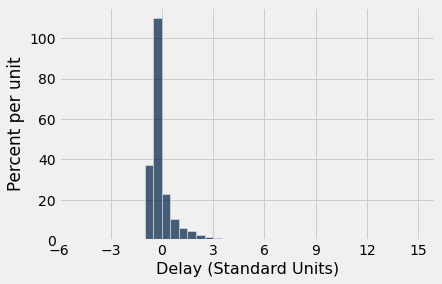

In [28]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));